In [2]:
import numpy as np
from tensorflow import keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
y_train.shape

(60000, 10)

In [8]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
model = keras.Sequential([
                          keras.Input(shape=x_train[0].shape),
                          keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64, 3, activation='relu'),
                          keras.layers.MaxPool2D(2),
                          keras.layers.Flatten(),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, use_multiprocessing=True)

Epoch 1/15
469/469 [==============================] - 9s 4ms/step - loss: 0.7138 - accuracy: 0.7876
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1112 - accuracy: 0.9662
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0817 - accuracy: 0.9739
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0699 - accuracy: 0.9786
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0576 - accuracy: 0.9825
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0535 - accuracy: 0.9825
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0459 - accuracy: 0.9857
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0459 - accuracy: 0.9854
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0407 - accuracy: 0.9866
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0393 - accuracy: 0.9881

In [12]:
acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.9905


In [13]:
acc[1]

0.9904999732971191

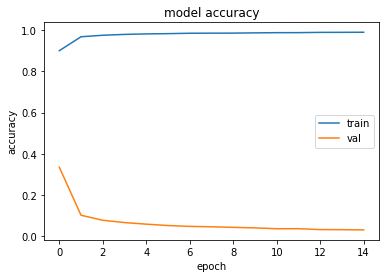

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Grid search Keras CNN

In [15]:
def tune_model(actvationfn):
  model = keras.Sequential([
                          keras.Input(shape=x_train[0].shape),
                          keras.layers.Conv2D(32, kernel_size=(3,3), activation=actvationfn),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64, 3, activation=actvationfn),
                          keras.layers.MaxPool2D(2),
                          keras.layers.Flatten(),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [16]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
model = KerasClassifier(build_fn=tune_model, epochs=15, batch_size=128, verbose=0)
params = {'actvationfn' : ['sigmoid','relu']}
gs = GridSearchCV(estimator=model, param_grid=params, verbose=1)
acc = gs.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.7min finished


In [18]:
acc

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd705f7bb00>,
             iid='deprecated', n_jobs=None,
             param_grid={'actvationfn': ['sigmoid', 'relu']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [19]:
grid_result = acc
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.989383 using {'actvationfn': 'relu'}
0.979650 (0.002037) with: {'actvationfn': 'sigmoid'}
0.989383 (0.001020) with: {'actvationfn': 'relu'}


In [20]:
acc.best_params_

{'actvationfn': 'relu'}

# Grid Search for activation, batch size, epochs

In [21]:
def tune_model(actvationfn):
  model = keras.Sequential([
                          keras.Input(shape=x_train[0].shape),
                          keras.layers.Conv2D(32, kernel_size=(3,3), activation=actvationfn),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64, 3, activation=actvationfn),
                          keras.layers.MaxPool2D(2),
                          keras.layers.Flatten(),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [22]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=tune_model, epochs=15, batch_size=128, verbose=0)
params = {'actvationfn' : ['sigmoid','relu'], 'batch_size':range(10,150,10)}
gs = GridSearchCV(estimator=model, param_grid=params, verbose=1, n_jobs=-1)
acc = gs.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 68.2min finished


In [23]:
grid_result = acc
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.991333 using {'actvationfn': 'relu', 'batch_size': 20}
0.985667 (0.001401) with: {'actvationfn': 'sigmoid', 'batch_size': 10}
0.985050 (0.001698) with: {'actvationfn': 'sigmoid', 'batch_size': 20}
0.984233 (0.001527) with: {'actvationfn': 'sigmoid', 'batch_size': 30}
0.983267 (0.001902) with: {'actvationfn': 'sigmoid', 'batch_size': 40}
0.982267 (0.001788) with: {'actvationfn': 'sigmoid', 'batch_size': 50}
0.981417 (0.001679) with: {'actvationfn': 'sigmoid', 'batch_size': 60}
0.982350 (0.001654) with: {'actvationfn': 'sigmoid', 'batch_size': 70}
0.981217 (0.001569) with: {'actvationfn': 'sigmoid', 'batch_size': 80}
0.980450 (0.002111) with: {'actvationfn': 'sigmoid', 'batch_size': 90}
0.979050 (0.001783) with: {'actvationfn': 'sigmoid', 'batch_size': 100}
0.980583 (0.001924) with: {'actvationfn': 'sigmoid', 'batch_size': 110}
0.979417 (0.001342) with: {'actvationfn': 'sigmoid', 'batch_size': 120}
0.978717 (0.002143) with: {'actvationfn': 'sigmoid', 'batch_size': 130}
0.978283 (

In [24]:
model = keras.Sequential([
                          keras.Input(shape=x_train[0].shape),
                          keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2)),
                          keras.layers.Conv2D(64, 3, activation='relu'),
                          keras.layers.MaxPool2D(2),
                          keras.layers.Flatten(),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=20, epochs=15, verbose=1, use_multiprocessing=True)
acc = model.evaluate(x_test, y_test)

Epoch 1/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3929 - accuracy: 0.8752
Epoch 2/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0772 - accuracy: 0.9755
Epoch 3/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0586 - accuracy: 0.9811
Epoch 4/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0467 - accuracy: 0.9852
Epoch 5/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 6/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0405 - accuracy: 0.9875
Epoch 7/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0391 - accuracy: 0.9875
Epoch 8/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0317 - accuracy: 0.9888
Epoch 9/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0336 - accuracy: 0.9901
Epoch 10/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.031

In [25]:
acc[1]

0.9932000041007996

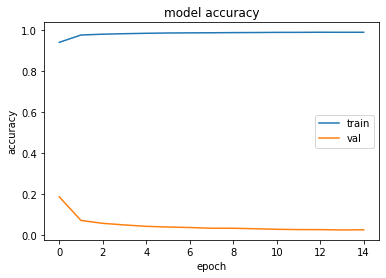

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [28]:
acc[0]

0.02374909445643425